In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('admission.csv')

# Split data into training and test sets
#Using the lambda function to 'slice' the dataframe into proper testing/training
train_data = df.groupby('Group').apply(lambda x: x.iloc[5:]).reset_index(drop=True)
test_data = df.groupby('Group').apply(lambda x: x.iloc[:5]).reset_index(drop=True)

# Preparing the data to use later on
X_train = train_data[['GPA', 'GMAT']]
y_train = train_data['Group']
X_test = test_data[['GPA', 'GMAT']]
y_test = test_data['Group']

# 3a)

C:\Users\Hasan\AppData\Local\Temp\ipykernel_32500\2320719192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='GPA', data=train_data, palette='Set1') #by group
C:\Users\Hasan\AppData\Local\Temp\ipykernel_32500\2320719192.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='GMAT', data=train_data, palette='Set1')


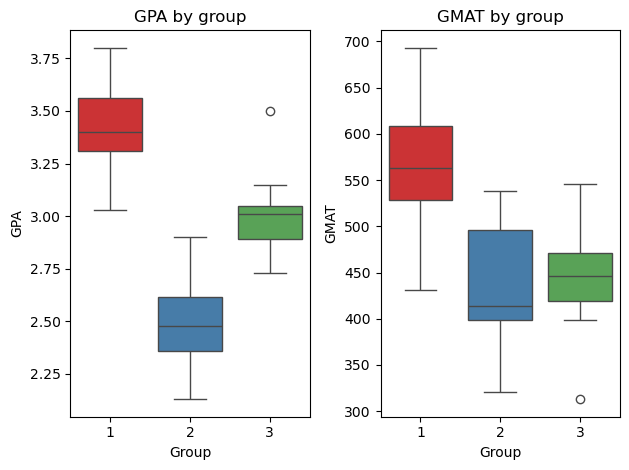

In [15]:
# creating box plots
plt.subplot(1, 2, 1)
sns.boxplot(x='Group', y='GPA', data=train_data, palette='Set1') #by group
plt.title('GPA by group')

#Using GMAT instead of GPA here
plt.subplot(1, 2, 2)
sns.boxplot(x='Group', y='GMAT', data=train_data, palette='Set1')
plt.title('GMAT by group')

plt.tight_layout()
plt.show()

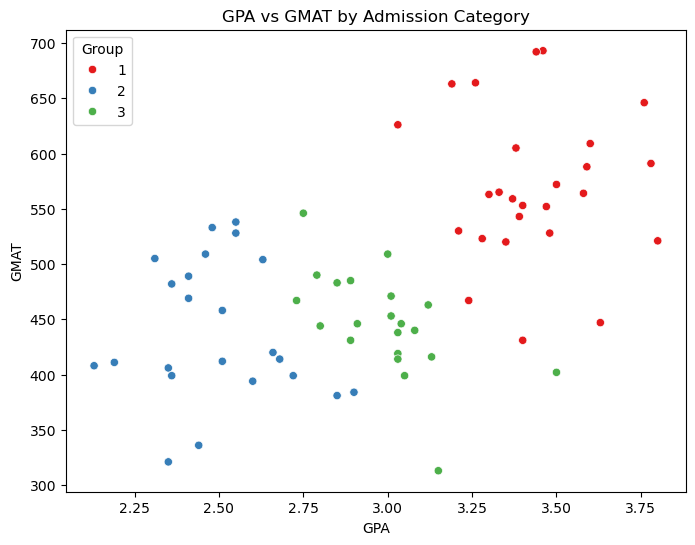

In [10]:
# Scatter plot of GPA vs GMAT, colored by Category
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GPA', y='GMAT', hue='Group', data=train_data, palette='Set1')
plt.title('GPA vs GMAT by Admission Category')
plt.show()


# 3b)

LDA Train Misclassification Rate: 0.08571428571428574
LDA Test Misclassification Rate: 0.19999999999999996
LDA Confusion Matrix (Test):
[[2 0 3]
 [0 5 0]
 [0 0 5]]


C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


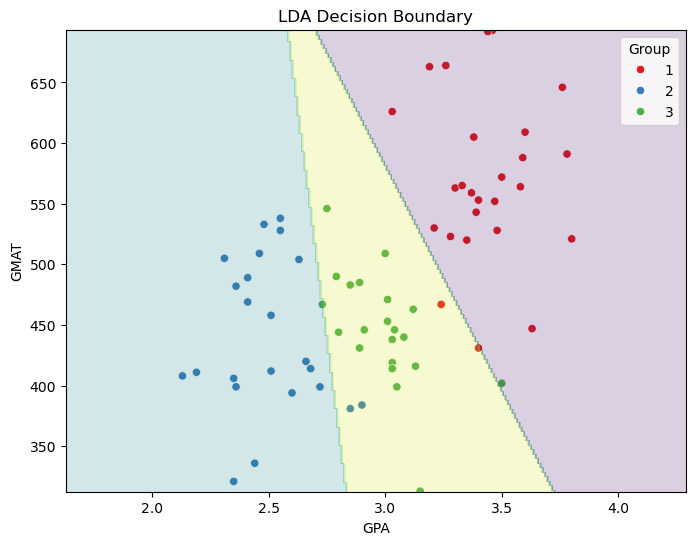

In [12]:
# Fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predictions
y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)

# Determining the Confusion matrix and misclassification rate
cm_train_lda = confusion_matrix(y_train, y_train_pred_lda)
cm_test_lda = confusion_matrix(y_test, y_test_pred_lda)
train_misclassification_rate_lda = 1 - accuracy_score(y_train, y_train_pred_lda) #probability of NOT being classified
test_misclassification_rate_lda = 1 - accuracy_score(y_test, y_test_pred_lda)

print(f"LDA Train Misclassification Rate: {train_misclassification_rate_lda}")
print(f"LDA Test Misclassification Rate: {test_misclassification_rate_lda}")
print("LDA Confusion Matrix (Test):")
print(cm_test_lda)

# decision boundary data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GPA', y='GMAT', hue='Group', data=train_data, palette='Set1') #Scatterplot for the data

#  grid for decision boundary
x_min, x_max = X_train['GPA'].min() - 0.5, X_train['GPA'].max() + 0.5
y_min, y_max = X_train['GMAT'].min() - 0.5, X_train['GMAT'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])  # utilizing ravel() do create the appropriate arrays
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2) #plotting predictions 

plt.title('LDA Decision Boundary')
plt.show()

# 3c)

QDA Train Misclassification Rate: 0.02857142857142858
QDA Test Misclassification Rate: 0.06666666666666665
QDA Confusion Matrix (Test):
[[4 0 1]
 [0 5 0]
 [0 0 5]]


C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


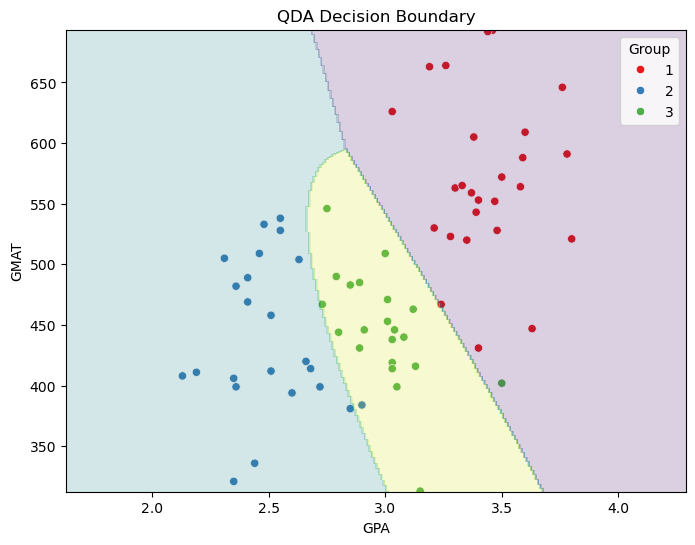

In [14]:
# Fit QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predictions
y_train_pred_qda = qda.predict(X_train)
y_test_pred_qda = qda.predict(X_test)

# Confusion matrix and misclassification rate
cm_train_qda = confusion_matrix(y_train, y_train_pred_qda)
cm_test_qda = confusion_matrix(y_test, y_test_pred_qda)
train_misclassification_rate_qda = 1 - accuracy_score(y_train, y_train_pred_qda)
test_misclassification_rate_qda = 1 - accuracy_score(y_test, y_test_pred_qda)

print(f"QDA Train Misclassification Rate: {train_misclassification_rate_qda}")
print(f"QDA Test Misclassification Rate: {test_misclassification_rate_qda}")
print("QDA Confusion Matrix (Test):")
print(cm_test_qda)

#deciison boundary fo the data
decision boundary dataplt.figure(figsize=(8, 6))
sns.scatterplot(x='GPA', y='GMAT', hue='Group', data=train_data, palette='Set1')#Scatterplot for the data

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()]) # utilizing ravel() To create the appropriate arrays
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2) 

plt.title('QDA Decision Boundary')
plt.show()